In [1]:
"""代表的な離散型確率分布"""
#推測統計では限られた標本から母集団の平均や分散といった指標を推定することが目的である。しかし、母集団の確率分布の形状に何も置かないでそのような指標を推定することは簡単なものではない。このように母集団の確率分布に何の家庭も置かないことを「ノンパラメトリック」な手法という。
#パラメトリック：ノンパラメトリックと対象となるのがパラメトリックな手法である。これは、母集団はこういう性質のはずだからこんな形状を持った確率分布だろうとある程度仮定を置いて、後は確率分布の期待値や分散を決定する小数のパラメタのみを推測する方法である。

#ライブラリのインポート
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

%precision 3
%matplotlib inline

In [18]:
# グラフの線の種類
linestyles = ['-', '--', ':']

def E(X, g=lambda x: x):
    x_set, f = X
    return np.sum([g(x_k) * f(x_k) for x_k in x_set])

def V(X, g=lambda x: x):
    x_set, f = X
    mean = E(X, g)
    return np.sum([(g(x_k)-mean)**2 * f(x_k) for x_k in x_set])

def check_prob(X):
    x_set, f = X
    prob = np.array([f(x_k) for x_k in x_set])
    assert np.all(prob >= 0), '負の確率があります'
    prob_sum = np.round(np.sum(prob), 6)
    assert prob_sum == 1, f'確率の和が{prob_sum}になりました'
    print(f'期待値は{E(X):.4}')
    print(f'分散は{(V(X)):.4}')

def plot_prob(X):
    x_set, f = X
    prob = np.array([f(x_k) for x_k in x_set])

    fig = plt.figure(figsize=(10, 6))

    ax = fig.add_subplot(111)
    ax.bar(x_set, prob, label='prob')
    ax.vlines(E(X), 0, 1, label='mean')
    ax.set_xticks(np.append(x_set, E(X)))
    ax.set_ylim(0, prob.max()*1.2)
    ax.legend()

    plt.show()

In [19]:
#ベルヌーイ分布
#ベルヌーイ分布は、最も基本的な離散型確率分布で、取り得る値が0と1しかない確率分布である。ベルヌーイ分布に従う確率変数の試行のことをベルヌーイ試行といい、1が出ることを成功、0が出ることを失敗という。
#取り得る値が2つしかなく、確率の和が1という性質から、どちらかの確率が定まればもう一方の確率が自動的に定まる。そのためベルヌーイ分布では1が出る確率をp,0が出る確率を1-pとする。このpがベルヌーイ分布の形を調整できる唯一のパラメタで、確率の性質を満たすために0<p<1を満たす必要がある

#ベルヌーイ分布の期待値と分散
#ベルヌーイ分布をNumPyで実装してみる。パラメタを定めることにより確率分布が確定するので、パラメタpを引数にx_setとｆを返す関数で実装する。
    
def Bren(p):
    x_set = np.array([0,1])
    def f(x):
        if x in x_set:
            return p ** x * (1-p) ** (1-x)
        else:
            return 0
    return x_set, f

In [20]:
#Bern(0.3)に従う確率変数Xをつくってみる。
p = 0.3
X = Bren(p)

In [21]:
#期待値と分散を計算
check_prob(X)

期待値は0.3
分散は0.21


NameError: name 'x_sert' is not defined

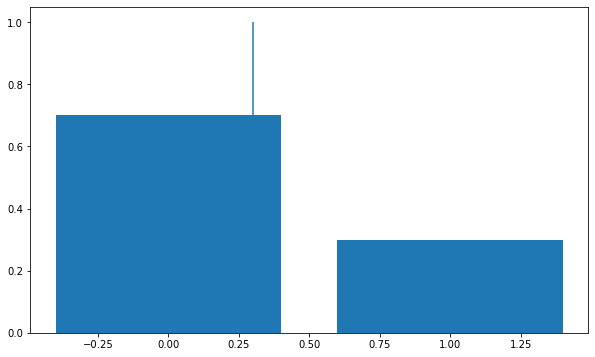

In [17]:
#確率変数Xを図示する。中央の縦線が確率変数Xの期待値を示している
plot_prob(X)

In [22]:
#scipy.statsを使った実装
#scipy.statsにはベルヌーイ分布にしたがy確率関数を造ることができるbernoulli関数がある。ベルヌーイ関数は引数にパラメタpをとり、返り値としてbern(p)に従うrv_frozen objectを返す。
#rv_frozen objectはscipy.statusにおける確率変数に相当するもので、様々なメソッドを持っている。
rv = stats.bernoulli(p)

In [23]:
#rvのpmfメソッドは確率関数を計算できる。0と1をそれぞれ渡すと、その値を取る確率が返ってくる。
rv.pmf(0), rv.pmf(1)

(0.7000000000000001, 0.3)

In [24]:
#pmfメソッドは引数リストを渡すこともできる。この場合、リストの各要素に対する確率を格納したNumpyのarrayが返ってくる。
rv.pmf([0,1])

array([0.7, 0.3])

In [25]:
#cdfメソッドを使うことで累積密度関数を計算できる。こちらも引数にリストを渡すことができる。
rv.cdf([0,1])

array([0.7, 1. ])

In [26]:
#meanメソッドやvarメソッドを呼び出すことで期待値や分散を計算できる
rv.mean(), rv.var()

(0.3, 0.21)